In [1]:
from client import CellClassifierClient
import os
import numpy as np

In [2]:
# Setup the configuration
root_dir = "../DSB_2018-master/"
model_file = "deepretina_final.h5"
host = 'localhost'
port = '10000'

In [3]:
try:
    cl = CellClassifierClient()
    cl.connect(host, port)
except ConnectionRefusedError:
    print(f"Server isn't running on {host}:{10000}")
    print(f"Start server by running 'python server.py' in another terminal")

Now run the analysis. It will be slow the first time if you are just starting up the server

In [4]:
analysis = cl.run('test/test_segment.tif','test/test_classify.tif', tf_gpu_fraction=.75)
print(np.where(analysis['model_data']))


(array([  4,   4,   4, ..., 761, 761, 761]), array([414, 415, 416, ...,  93,  94,  95]))


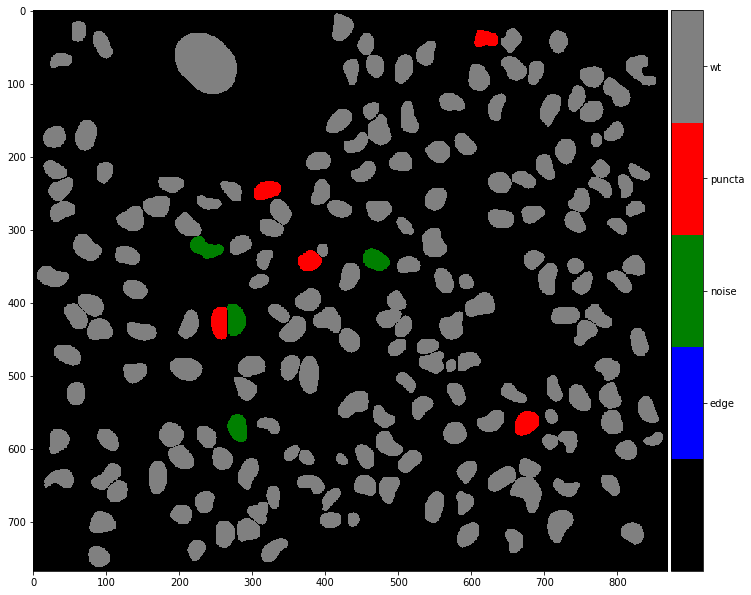

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax = plt.subplots(figsize=(12,12))
cmap = ListedColormap(['black','blue','green','red','gray'])
norm = BoundaryNorm(range(0,6),cmap.N)
img = ax.imshow(analysis['model_data'],cmap=cmap,norm=norm)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(img,cax=cax,ticks=[1.5,2.5,3.5,4.5])
_ = cb.ax.set_yticklabels(['edge','noise','puncta','wt'])